In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import keras
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers,losses
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from tensorflow.keras.models import Model

In [2]:
(X_train,_),(X_test,_)=mnist.load_data()

In [3]:
X_train.shape,X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [4]:
X_val=X_train[-10000:]

In [5]:
X_train.shape,X_val.shape

((60000, 28, 28), (10000, 28, 28))

In [6]:
x_train=X_train.astype('float32')/255.
x_test=X_test.astype('float32')/255.
x_val=X_val.astype('float32')/255.

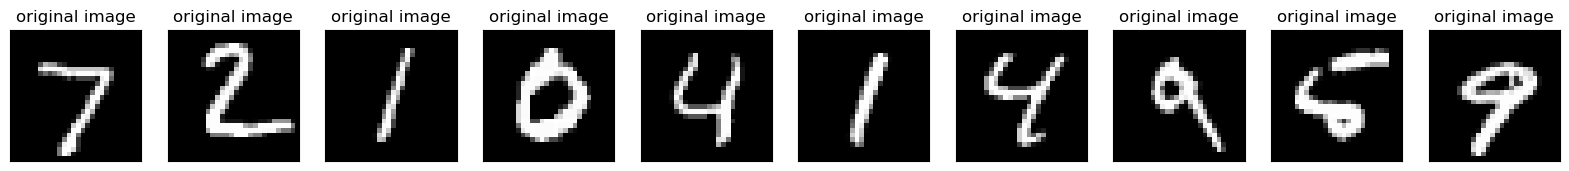

In [7]:
n=10
plt.figure(figsize=(20,4))
for i in range(n):
    ax=plt.subplot(2,n,i + 1)
    plt.imshow(X_test[i])
    plt.title("original image")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    

In [8]:
dimention=60

class Autoencoder(Model):
    def __init__(self,dimention):
        super(Autoencoder,self).__init__()
        self.dimention=dimention
        
        self.encoder=keras.Sequential([layers.Flatten(),
                                       layers.Dense(dimention,activation='relu'),])
        self.decoder=Sequential([layers.Dense(784,activation='sigmoid'),
                                 layers.Reshape((28,28))])
    def call(self,x):
        encoded=self.encoder(x)
        decoded=self.decoder(encoded)
        return decoded

autoencoder=Autoencoder(dimention)

In [9]:
autoencoder.compile(optimizer='adam',loss=losses.MeanSquaredError())

In [10]:
autoencoder.fit(x_train,x_train,epochs=10,shuffle=True,validation_data=(x_val,x_val))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0451 - val_loss: 0.0100
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0085 - val_loss: 0.0058
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0056 - val_loss: 0.0050
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0050 - val_loss: 0.0047
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0048 - val_loss: 0.0046
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0046 - val_loss: 0.0045
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0046 - val_loss: 0.0045
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0045 - val_loss: 0.0044
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0044 - val_loss: 0.0044
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0044 - val_loss: 0.0044


In [11]:
print(autoencoder.encoder.summary())
print(autoencoder.decoder.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (32, 784)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 60)               │        47,100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,100 (183.98 KB)

 Trainable params: 47,100 (183.98 KB)

 Non-trainable params: 0 (0.00 B)

None


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (32, 784)              │        47,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (32, 28, 28)           │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,824 (186.81 KB)

 Trainable params: 47,824 (186.81 KB)

 Non-trainable params: 0 (0.00 B)

None


In [12]:
encoded_imgs=autoencoder.encoder(x_test).numpy()
decoded_imgs=autoencoder.decoder(encoded_imgs).numpy()

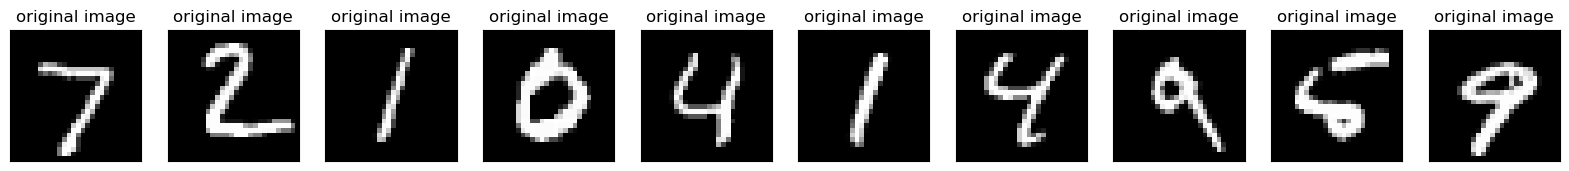

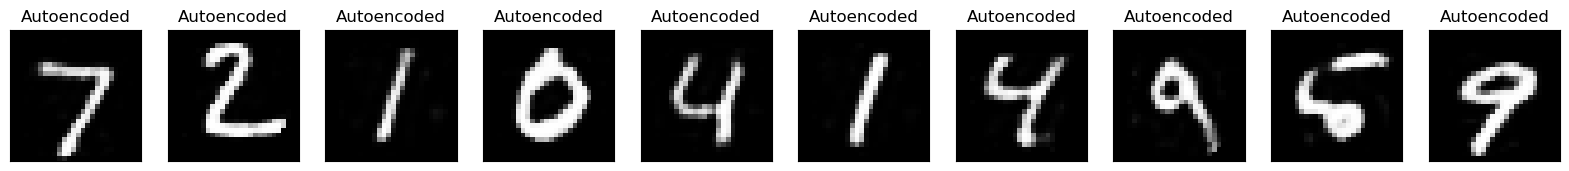

In [28]:
n=10
plt.figure(figsize=(20,4))
for i in range(n):
    ax=plt.subplot(2,n,i + 1)
    plt.imshow(X_test[i])
    plt.title("original image")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

n=10
plt.figure(figsize=(20,4))
for i in range(n):
    ax=plt.subplot(2,n,i + 1)
    plt.imshow(decoded_imgs[i])
    plt.title("Autoencoded")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    

# trnsfer Learnings